## Cwiczenie 1 (1 pkt)

Dane pochodzą z rozkładu y_i = m*x_i + b + N(0, 1). Dla zadanego zbioru policz log-likelihood danych dla m=2.0 i b=0.1, gdzie loglikelihood =  $log \prod_i p(y_i | m, x_i) = \sum log p(y_i | m, x_i)$

-12.5050003668


/usr/lib/python3.6/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in log


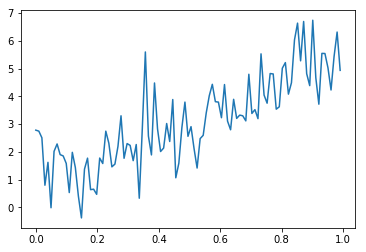

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import math
import scipy.stats as stats
## Syntetyczny zbiór danych
np.random.seed(123456789)

def y(x,m,b,mu=0,sigma=1): 
    return m*x + b + np.random.normal(mu,sigma,1)[0]

N = 101
M = 2
t = np.empty(N)
domain_bound = 1.0/N
domain = np.empty(N)

for i in range(N): 
    domain[i] = i*domain_bound
    
for i in range(N): 
    t[i] = y(x=domain[i],m=4.89,b=0.57)
    
plt.plot(domain,t)

#task 1
log = []
for i in range(N): 
    log.append(np.log(y(domain[i], m=2, b=0.1)))
loglike = np.nansum(log)

print(loglike)

## Ćwiczenie 2 (1 pkt)

Napisać funkcję, która przyjmuje dwuwymiarową dodatnio określoną macierz $A$, a następnie:
1. Rysuje heatmap dla $v^TAv$.
2. Na tym samym wykresie:
    - rysuje okrąg jednostkowy,
    - rysuje elipsę jednostkową dla $A$,
    - rysuje elipsę jednostkową dla $A^{-1}$.

Jedyną trudność może sprawić narysowanie elipsy jednostkowej. Proponuję zrobić to w następujący sposób:
1. Zacząć od listy wektorów na okręgu jednostkowym - punkty postaci $(\cos(\alpha), \sin(\alpha))$, gdzie $\alpha$ są rozmieszczone równomiernie na odcinku $[0,2\pi)$.
2. Dla każdego wektora $v$ liczymy $\|v\|^2 = v^TAv$ - chcielibyśmy, żeby $\|v\| = 1$, więc w tym celu wystarczy zastąpić $v$ przez $\frac{v}{\sqrt{v^TAv}}$.
3. Mamy listę kolejnych punktów leżących na elipsie jednostkowej macierzy $A$, rysujemy je i łączymy odcinkami.

Oczywiście najwygodniej będzie stworzyć funkcję pomocniczą draw_ellipse, której podamy kolejno macierz identycznościową (aby uzyskać okrąg), macierz $A$ i $A^{-1}$.

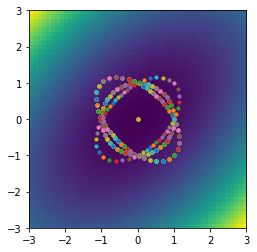

In [2]:
# Spodziewany efekt - albo mała elipsa wewnątrz okręgu wewnątrz dużej elipsy,
# albo duża i mała elipsa przecinają się dokładnie na okręgu

A = np.matrix([[1, 1],[0, 1]])

x = -3
y = 3
n = 50
N = np.linspace(x, y, n)
heatmap = np.empty((n, n))
for i in range(n):
    for j in range(n):
        v = np.matrix([N[i], N[j]]).T
        heatmap[i, j] = v.T.dot(A).dot(v)   
    
def ellipse(A, n = 50):   
    v = np.empty((n, 2))
    for i, a in enumerate(np.linspace(0, math.pi * 2, n)):
        v[i] = [math.cos(a), math.sin(a)]
        v[i] /= math.sqrt(v[i].T.dot(A).dot(v[i]))
        plt.scatter(v[i:,0], v[i:,1], s = 10)        
        
plt.imshow(heatmap, extent=[x, y, x, y])
ellipse(np.identity(2))
ellipse(A)
ellipse(np.linalg.inv(A))
plt.show()

## Ćwiczenie 2 (1 pkt)

Wylosować 1000 punktów z dwuwymiarowego rozkładu normalnego o losowej macierzy $\Sigma$. Następnie wyestymować kowariancje z próbki i porównać z macierzą kowariancji.

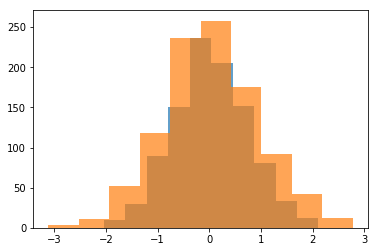

[[ 0.51549147  0.614273  ]
 [ 0.614273    0.85001295]]
[[ 0.50222442  0.60343626]
 [ 0.60343626  0.84796073]]


In [3]:
# Spodziewany wynik - powinno wyjść prawie to samo

N = 1000
Mean = [0.0, 0.0]
A = np.random.rand(2,2)

cov = np.dot(A,A.transpose())
data = np.random.multivariate_normal(Mean, cov, N)
plt.hist(data[:,0], alpha = 0.7)
plt.hist(data[:,1], alpha = 0.7)
plt.show()

i = np.ones((N,1))
means = np.average(data, axis=0).reshape((2, 1)).T
print(1.0/(N - 1.0)*(data - i.dot(means)).T.dot(data - i.dot(means)))
print(cov)

Przypomnijmy teraz jeszcze kilka ważnych własności, które sprawiają, że rozkład Gaussa w naturalny sposób pojawia się w zastosowaniach praktycznych.

## Ćwiczenie 3 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Wylosować dwie serie po 1000 punktów z dwóch różnych jednowymiarowych rozkładów Gaussa. Narysować histogramy. Następnie umieścić wyniki w tabeli 1000 na 2 i narysować rozkład produktowy (zaznaczyć wylosowane pary punktów na płaszczyźnie).

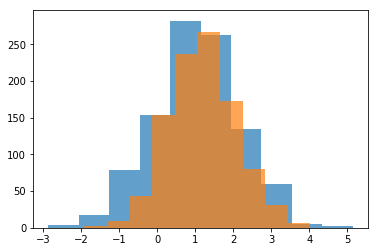

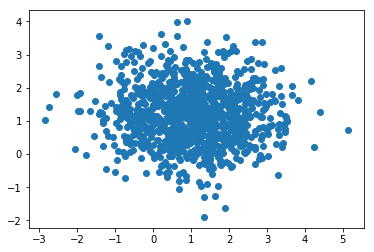

In [4]:
# spodziewany wynik - elipsa o osiach ustawionych równolegle do osi układu współrzędnych
N = 1000
a = np.random.normal(1, 1.1, 1000)
b = np.random.normal(1.2, 0.9, 1000)

plt.hist(a, alpha = 0.7)
plt.hist(b, alpha = 0.7)
plt.show()

plt.scatter(a,b)
plt.show()

## Ćwiczenie 4 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Wziąć dane z poprzedniego ćwiczenia (tysiąc punktów na płaszczyźnie) i obrócić zbiór danych o kąt $\alpha$ (np. 43 stopnie) względem początku układu współrzędnych - w tym celu każdy wiersz tabeli z danymi należy przemnożyć przez macierz:
$$\begin{bmatrix}
    \cos(\alpha) & -\sin(\alpha) \\
    \sin(\alpha) & \cos(\alpha) \\
\end{bmatrix}$$

Narysować nowe punkty na płaszczyźnie.

Narysować histogramy rozkładów brzegowych (czyli wziąć pierwszą współrzędną wszystkich punktów i narysować dla niej histogram, potem analogicznie zrobić z drugą współrzędną). Sprawdzić (wizualnie), że rozkłady brzegowe są rozkładami Gaussa.

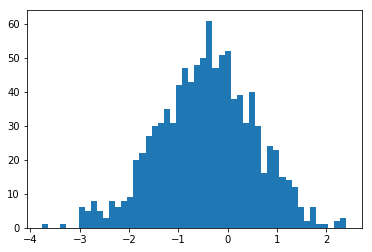

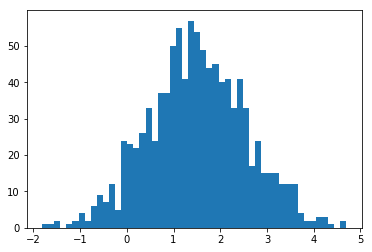

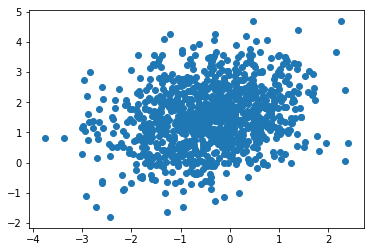

Assert:


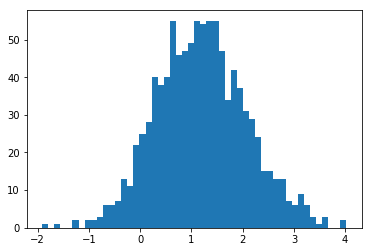

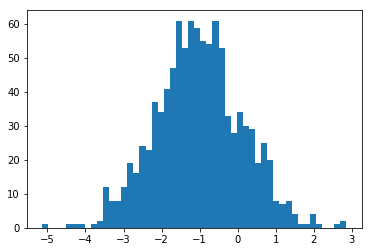

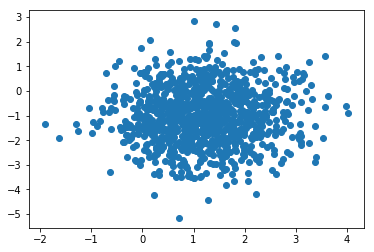

Compare to:


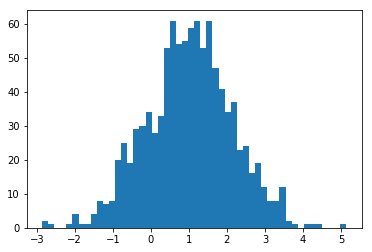

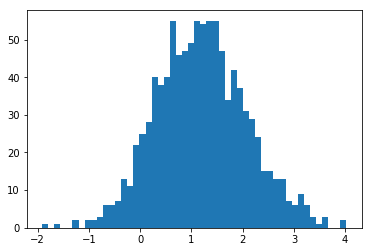

In [5]:
# Assert:
# przyjąć alpha = Pi/2
# wtedy drugi rozkład brzegowy powinien być pierwszym rozkładem z poprzedniego ćwiczenia,
# a pierwszy rozkład brzegowy odbiciem symetrycznym względem zera drugiego rozkładu
# z poprzedniego ćwiczenia (dlaczego?)

def distr(A, a, b):
    M = np.array([[ math.cos(A), -math.sin(A)], [math.sin(A), math.cos(A)]])
    data = np.array([np.dot(np.column_stack((a, b))[i], M) for i in range(N)])

    plt.hist(data[:,0], bins = 50)
    plt.show()
    plt.hist(data[:,1], bins = 50)
    plt.show()
    plt.scatter(data[:,0], data[:,1])
    plt.show()

A = 43
distr(A, a, b)
print("Assert:")
A = math.pi/2
distr(A, a, b)
print("Compare to:")
plt.hist(a, bins = 50)
plt.show()
plt.hist(b, bins = 50)
plt.show()

## Ćwiczenie 5 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Powtórzyć dwa poprzednie ćwiczenia, ale na początku wylosować po 1000 punktów z dwóch różnych rozkładów jednostajnych (pierwszy na odcinku $[a, b]$, drugi na odcinku $[c, d]$). Sprawdzić, że po obrocie rozkład brzegowy nie jest jednostajny.

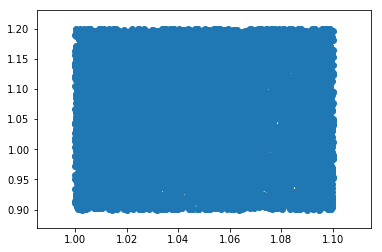

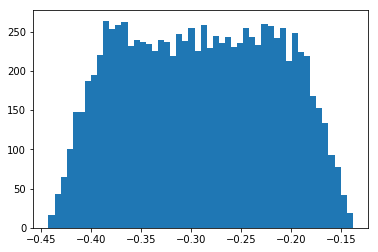

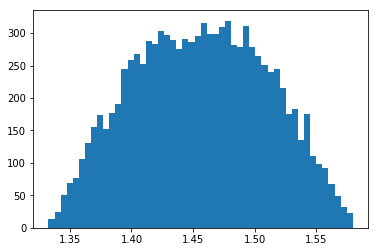

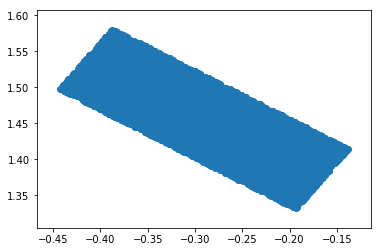

In [6]:
# Spodziewany efekt - rozkład brzegowy ma kształt trapezu.
N = 10000

a = np.random.uniform(1, 1.1, N)
b = np.random.uniform(1.2, 0.9, N)

plt.scatter(a,b)
plt.show()

A = 43
distr(A, a, b)

Suma dwóch rozkładów Gaussa jest rozkładem Gaussa.

## Ćwiczenie 6 (1 pkt)

[Nieobowiazkowe w grupie S.J.] Wykorzystać dwie serie danych z ćwiczenia 2. w celu udowodnienia powyższej uwagi - stworzyć odpowiednią trzecią serię danych (jaką?) i narysować jej histogram. Sprawdzić wizualnie, że jest to rozkład Gaussa.

Powtórzyć dla serii danych z rozkładu jednostajnego (ćwiczenie 4.), przekonać się, że suma rozkładów jednostajnych nie jest rozkładem jednostajnym. 

a)


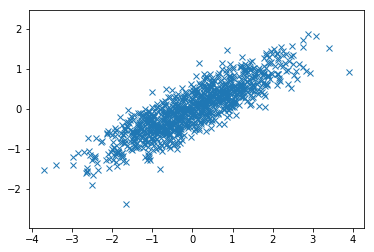

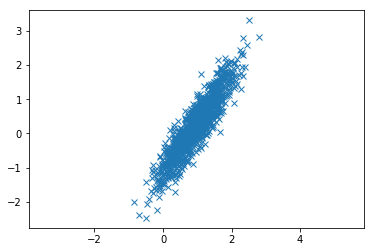

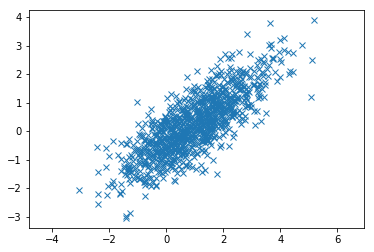

b)


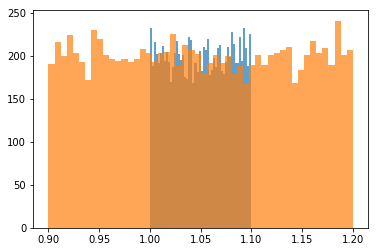

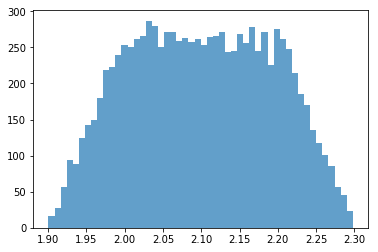

In [7]:
# Spodziewany efekt:
#  - histogram rozkładu Gaussa
#  - histogram w kształcie trapezu równoramiennego lub trójkąta
# Spodziewany wynik - powinno wyjść prawie to samo

print("a)")
N = 1000
Mean1 = [0.0, 0.0]
A = np.random.rand(2,2)
cov1 = np.dot(A,A.transpose())
data1 = np.random.multivariate_normal(Mean1, cov1, N)

Mean2 = [1.0, 0.3]
B = np.random.rand(2,2)
cov2 = np.dot(B,B.transpose())
data2 = np.random.multivariate_normal(Mean2, cov2, N)

plt.plot(data1[:,0], data1[:,1], 'x')
plt.axis('equal')
plt.show()

plt.plot(data2[:,0], data2[:,1], 'x')
plt.axis('equal')
plt.show()

data3 = np.add(data1, data2)
plt.plot(data3[:,0], data3[:,1], 'x')
plt.axis('equal')
plt.show()

print("b)")
N = 10000
data4 = np.random.uniform(1, 1.1, N)
data5 = np.random.uniform(1.2, 0.9, N)
data6 = np.add(data4, data5)
plt.hist(data4, bins = 50, alpha = 0.7)
plt.hist(data5, bins = 50, alpha = 0.7)
plt.show()
plt.hist(data6, bins = 50, alpha = 0.7)
plt.show()


## Ćwiczenie 7 (1 pkt)

"Udowodnić" powyższe twierdzenie w następujący sposób:
1. Wylosować $k$ serii po 1000 punktów z rozkładu jednostajnego na odcinku $[0,1]$.
2. Zsumować te rozkłady.
3. Narysować histogramy sumy np. dla $k = 1, 2, 3, 5, 10$.
4. (Dla odważnych) Zamiast sumy zastosować poprawny wzór z Wikipedii (od każdego rozkładu odjąć średnią, uśrednić arytmetycznie zamiast sumować, przypomnieć sobie wzór na $\sigma$ rozkładu jednostajnego na odcinku, podzielić przez $\frac{\sigma}{\sqrt{n}}$).

k =  1


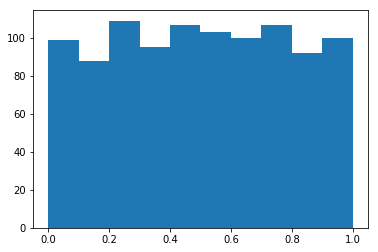

k =  2


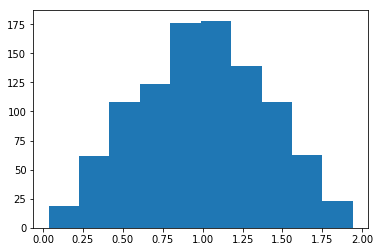

k =  3


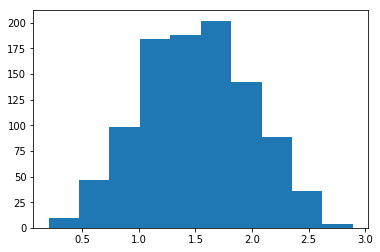

k =  5


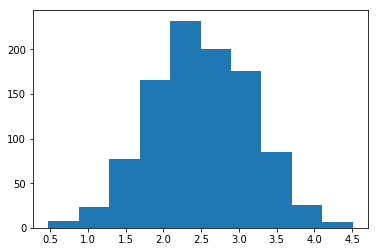

k =  10


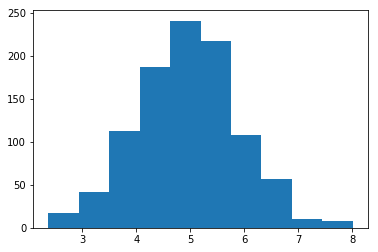

In [8]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000
for k in [1,2,3,5,10]:
    print ("k = ", k)
    Sum = np.random.uniform(0, 1, N)
    a = []
    for i in range (0, k - 1):
        a = np.random.uniform(0, 1, N)
        Sum = [a[i] + Sum[i] for i in range(len(a))];
    
    plt.hist(Sum)
    plt.show()